In [2]:
import pandas as pd
import numpy as np

Read the data from titanic-data.csv and show some sample data

In [8]:
df = pd.read_csv('titanic_data.csv')
df.head(15)




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [247]:
print(df.columns)
df.info()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Check the columns' name and interpret them:

PassengerId => 乘客ID,int

Survived => 是否存活, 0=否，1=是

Pclass => 乘客等级(1/2/3等舱位)

Name => 乘客姓名，string

Sex => 性别， male/female

Age => 年龄，有一些缺失值为NaN

SibSp => 堂兄弟/妹个数，int

Parch => 父母与小孩个数,int

Ticket => 船票信息

Fare => 票价

Cabin => 客舱号，有一些为NaN

Embarked => 登船港口

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


从上可以发现，这艘船的平均生还率为 38.39% \n 此时，我提出我的问题：有哪些因素会让船上的人生还率更高？

为了探索这个问题，我们首先要进行数据清洗，第一步先填充上缺失值。

In [249]:
#用平均值来填充缺失的年龄
df.Age = df.Age.fillna(df.Age.mean())
#用’S’ 来填充缺失的embarked
df.Embarked = df.Embarked.fillna('S')
#由于cabin缺失数量过多，我决定删掉这一列
df = df.drop(['Cabin'],axis=1)

展示一下缺失值处理过后的dataframe

In [250]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


我们还需要对性别进行一下处理, male =1 female = 0

In [252]:
#应用apply函数可以对一列数据做同一个操作
def sexprocess(sex):
    if sex == "male":
        result = 1
    else:
        result = 0
    return result
df['Sex']= pd.Series(df['Sex']).apply(sexprocess)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,C


回顾问题，让我们看一下生存与否与其它特征间的相关系数

In [253]:
df.corr()["Survived"].sort_values()

Sex           -0.543351
Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

抛开survived特征本身，可以观察到 survived 相关性最高的三个特征的(绝对值）从大到小依次为: Sex,Pclass, Fare

让我们用图像来看下各个特征间的相关性,可以再次验证我们之前得到的结果

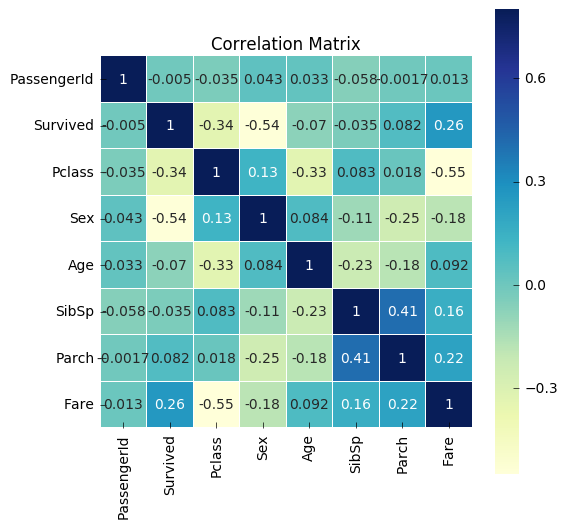

In [254]:
corr=df.corr()#["Survived"]
plt.figure(figsize=(6, 6))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation Matrix')
plt.show()

前边的分析，已经确定了三个相关程度最高的特征(Pclass, Fare,Parch), 接下来我们具体去看一看这些特征到底是怎么影响survive与否的

第一个自变量特征：Pclass

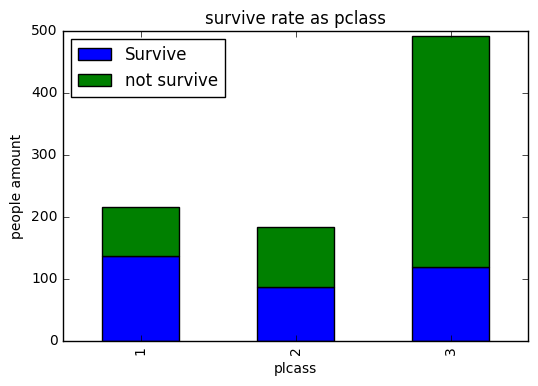

class 1 survive rate:0.6296296296296297
class 2 survive rate:0.47282608695652173
class 3 survive rate:0.24236252545824846


In [255]:
#P class 一共有三个类别，分别为 1，2，3
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = df.Pclass[df.Survived == 0].value_counts()
Survived_1 = df.Pclass[df.Survived == 1].value_counts()
dfp=pd.DataFrame({u'Survive':Survived_1, u'not survive':Survived_0})
dfp.plot(kind='bar', stacked=True)
plt.title(u"survive rate as pclass")
plt.xlabel(u"plcass") 
plt.ylabel(u"people amount") 
plt.show()
a = (dfp.iloc[0,0].mean())/(dfp.iloc[0].values.sum())
b = (dfp.iloc[1,0].mean())/(dfp.iloc[1].values.sum())
c = (dfp.iloc[2,0].mean())/(dfp.iloc[2].values.sum())
print('class 1 survive rate:{}'.format(a))
print('class 2 survive rate:{}'.format(b))
print('class 3 survive rate:{}'.format(c))

可见, 船舱等级高的人，存活下来的概率要比船舱等级低的人更大

第二个自变量特征： Sex


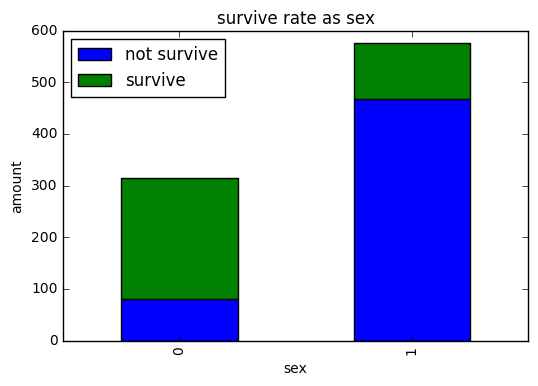

female survive rate:0.7420382165605095
male survive rate:0.18890814558058924


In [256]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_yes = df.Sex[df.Survived == 1].value_counts()
Survived_no = df.Sex[df.Survived == 0].value_counts()
dfs=pd.DataFrame({u'survive':Survived_yes, u'not survive':Survived_no})
dfs.plot(kind='bar', stacked=True)
plt.title(u"survive rate as sex")
plt.xlabel(u"sex") 
plt.ylabel(u"amount")
plt.show()
a = (dfs.iloc[0,1].mean())/(dfs.iloc[0].values.sum())
b = (dfs.iloc[1,1].mean())/(dfs.iloc[1].values.sum())
print('female survive rate:{}'.format(a))
print('male survive rate:{}'.format(b))



结论:<br>
1.总结:<br>
通过相关性分析，我们初步推断出对乘客存活率影响最大的三个特征为Sex,Pclass和Fare.<br>
具体来说：Sex为female时，存活率更高.<br>
Pclass为1时，存活率更高；Pclass为2时，存活率次之；而当Pclass为3时，存活率为三组中最低的。<br>
Fare特征由于是连续性特征，不易处理，考虑到fare与pclass有较强的相关性，推测其对存活率的效果与pclass近似（fare高时，存活率更高）<br>
<br>一些限制:<br>
1.样本: 本数据集共包含891条数据,经过调查发现,这些数据并不是当时泰坦尼克号上的所有用户的全部数据；<br>2.其次，我们并不清楚样本是否随机选取,且我对于一些缺失值进行了较为粗糙的填充，这可能会带入偏差和不确定性。<br>3.目前我们具有的特征并无法完全覆盖到每一个能影响生存率的因素，比如乘客的“身高”，“体重”，“学历”等因素是否与“生存率”同样具有很高的相关性呢？ 由于特征所限, 我们不得而知。<br>

综上,我们的初步结论并无法表明这三个因素与“生还率”具有明确的因果性，只是简单地探索与尝试，要想给出明确结论，需要更完整的数据集与更精确的处理手段。

